## Atividades Propostas

**Questão 1) Considere uma rede ER com N=3000 nós, conectados entre si com probabilidade p = 0,001.**

**a) Qual o número esperado de arestas  <L>?**

Como a rede aleatória segue a distribuição binomial, o número de arestas esperado é:

<L> = p * (N * (N - 1))/2

Substituindo os valores apresentados:

<L> = 0.001 * ( 3000 * ( 3000 - 1 ) ) / 2
<L> = 4498,5        ou aproximadamente  L = 4499

**b) Em qual regime está a rede?**

O regime que a rede pertence depende do p da rede. Se p < 1/N a rede está no regime subcrítico, se p = 1/N a rede está no regime crítico, se p > 1/N  a rede está no regime supercrítico e se o p > ln N / N então a rede está no regime conectado.

p = 0.001 

1/N = 0.000333333

ln N / N =  0,002668789

Como p > 1/N mas não é maior que ln N / N, então a rede está no regime supercrítico. 


**Questão 2)**

**a) Gere uma rede com o modelo G(N,p) e compute o grau médio <k> e número de arestas médio <L>. Como a geração desse tipo de rede não é um processo determinístico, será preciso repetir o processo algumas vezes e considerar a média dos <k> e <L> obtidos. Compare os resultados simulados com o resultado esperado analiticamente. Considere N=300 e L=900.**

Como o algoritmo a ser usado para gerar a rede é o G(N, p) e a informação dada foi número de Nós e arestas, devemos descobrir qual é o p para ter esse número de arestas. Pela fórmula:

(2*L) / N = p * ( N - 1)

p = 0,02

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


In [2]:

N = 300
L = 900
p = (2 * L) / (N * (N - 1))

g = nx.gnp_random_graph(N, p)
l = g.number_of_edges()
k = (2 * l) / N 
#print(g.number_of_nodes())
#print(g.number_of_edges())
#print(np.mean(g.degree()))

interacoes = 20000

for i in range(interacoes - 1):
    g = nx.gnp_random_graph(N, p)
    l = l + g.number_of_edges()
    k = k + (2 * l) / N 


print(f'Média de arestas: {l/interacoes: .1f}')
print(f'Média dos graus: {k/interacoes}')

Média de arestas:  900.0
Média dos graus: 60017.282585333276


*b) Baixe alguma rede real a partir das bases de dados que estudamos, gere a rede ER correspondente a ela, contendo o mesmo número de nós N e arestas L, usando o G(N,L), e compare as distribuições de grau. Qual o grau máximo e mínimo das duas redes? (Para obter um resultado mais fidedigno, é preciso computar o caso médio, pois a geração de redes aleatórias não é um processo determinístico).*


In [3]:
df = pd.read_csv('rt_voteonedirection.edges', header=None, usecols=[0, 1])

df.to_csv('edges_cleaned.txt', sep=' ', index=False, header=False)


In [4]:
# Rede real

g_real = nx.read_edgelist('edges_cleaned.txt')
N = g_real.number_of_nodes()
L = g_real.number_of_edges()
k_real = g_real.degree()

print(f'Rede Real: \n N = {N}     L = {L}')

Rede Real: 
 N = 2280     L = 2464


In [5]:
# Rede aleatória

k_ale = np.zeros(N)

interacoes = 20000


for i in range(interacoes):
    g_aleatoria = nx.gnm_random_graph(N, L)
    degree_list = np.array([deg for _, deg in g_aleatoria.degree()])

    k_ale = k_ale + degree_list

k_ale = k_ale / interacoes

#print(f'Rede Aleatória: \n N = {g_aleatoria.number_of_nodes()}     L = {g_aleatoria.number_of_edges()}')

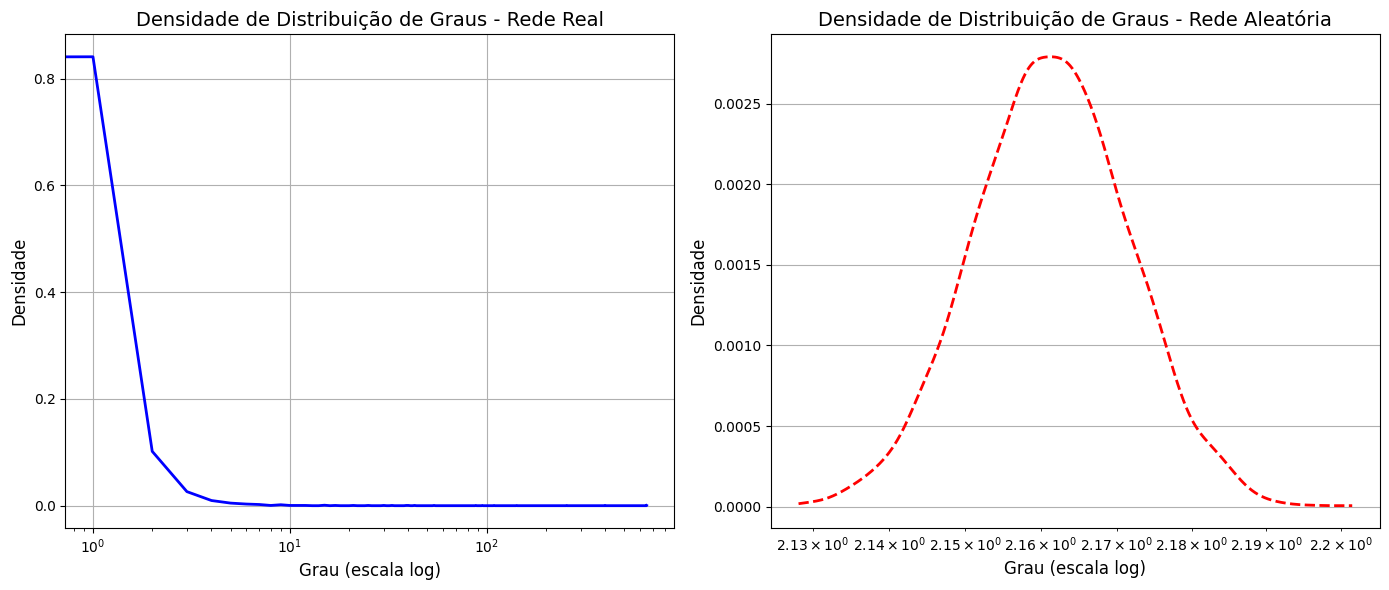

In [6]:
# Obtendo os graus da rede real
degrees_real = np.array([deg for _, deg in k_real])

# Suavizando a distribuição da rede aleatória com KDE
kde_ale = gaussian_kde(k_ale)

# Criando um conjunto de pontos no eixo x para o gráfico KDE
x_kde = np.linspace(min(k_ale), max(k_ale), 1000)

# Obtendo o histograma e a densidade da rede real com normalização
hist_real, bins_real = np.histogram(degrees_real, bins=range(max(degrees_real)+1), density=True)

# Calcula a curva KDE normalizada
kde_ale_values = kde_ale(x_kde)
kde_ale_normalized = kde_ale_values / kde_ale_values.sum()  # Normalização da KDE

# Criando os gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico da rede real
axs[0].plot(bins_real[:-1], hist_real, label='Rede Real', color='blue', linewidth=2)
axs[0].set_title('Densidade de Distribuição de Graus - Rede Real', fontsize=14)
axs[0].set_xlabel('Grau (escala log)', fontsize=12)
axs[0].set_ylabel('Densidade', fontsize=12)
axs[0].set_xscale('log')  # Coloca o eixo x em escala logarítmica
axs[0].grid(True)

# Gráfico da rede aleatória
axs[1].plot(x_kde, kde_ale_normalized, label='Rede Aleatória (KDE)', color='red', linestyle='--', linewidth=2)
axs[1].set_title('Densidade de Distribuição de Graus - Rede Aleatória', fontsize=14)
axs[1].set_xlabel('Grau (escala log)', fontsize=12)
axs[1].set_ylabel('Densidade', fontsize=12)
axs[1].set_xscale('log')  # Coloca o eixo x em escala logarítmica
axs[1].grid(True)

# Ajustando o layout e mostrando os gráficos
plt.tight_layout()
plt.show()
